# Practice 19

# Edge Detection and denoising

### import part

In [1]:
import cv2 as cv

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img_cv (img_title, img):
    cv.imshow(img_title,img)
    cv.waitKey(0)
    cv.destroyWindow()

In [3]:
def image_plot (img , width =6 , hight = 8 , c_map='gray' , title = 'image', vmin=0 , vmax=255):
    plt.figure(figsize=(hight,width),dpi=100)
    plt.axis('off')
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.show()

In [4]:
def display_hist_bins(img, bins = 256, range=(0,256), title = 'histogram'):
    plt.figure(figsize= (6,4) , dpi=100)
    plt.hist(img.flat , bins , range)
    plt.title(title)
    plt.show()

In [5]:
def show_multiple_img(row, columns, img, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15,17),dpi=100)
    for i in range(len(img)):
        fig.add_subplot(row, columns, i+1)
        plt.imshow (img[i],cmap='gray', vmin=vmin , vmax = vmax)
        plt.axis('off')
        plt.title('img'+str(i))

## Read Image

In [6]:
org_img = cv.imread(r'img/input.jpg',cv.IMREAD_UNCHANGED)

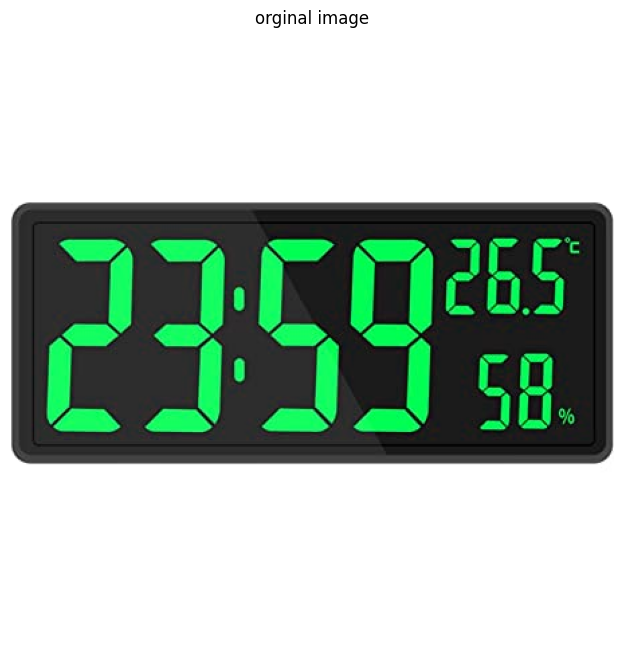

In [7]:
image_plot(org_img,width = 8, hight = 12 , title = 'orginal image')

In [8]:
img_gray = cv.cvtColor(org_img,cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(img_gray,(3,3),0)

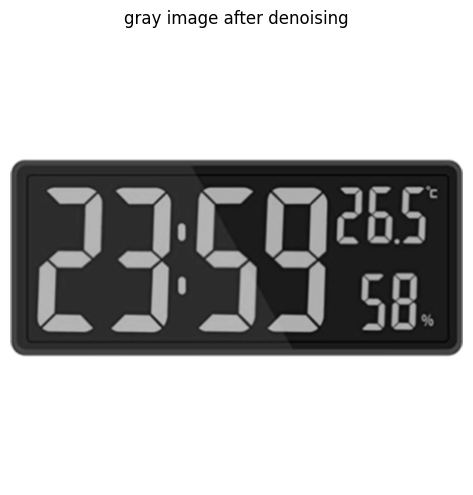

In [9]:
#show image
image_plot(img_blur, title= 'gray image after denoising')

## Gradient

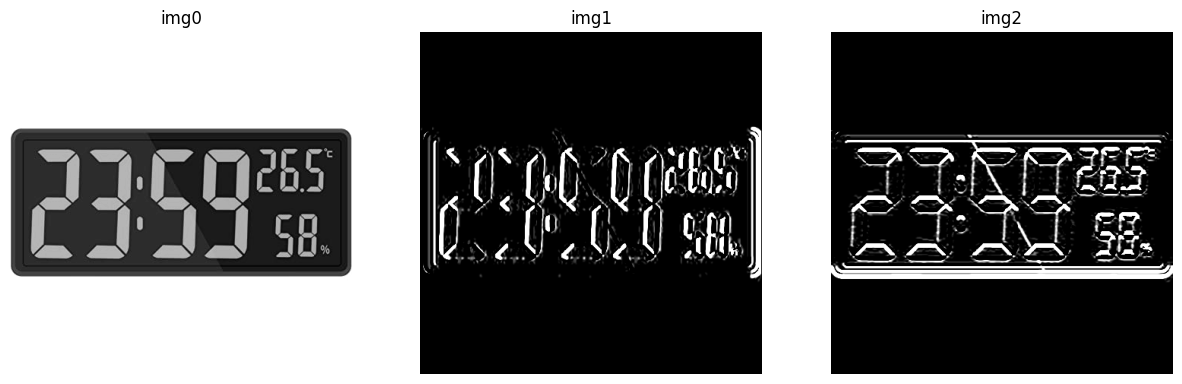

In [10]:
# Gradient
## using sobel
sobelx = cv.Sobel(src=img_blur,ddepth=-1,dx=1,dy=0, ksize=5)
sobely = cv.Sobel(src=img_blur,ddepth=-1,dx=0,dy=1, ksize=5)
show_multiple_img(1,3,(img_gray,sobelx,sobely))

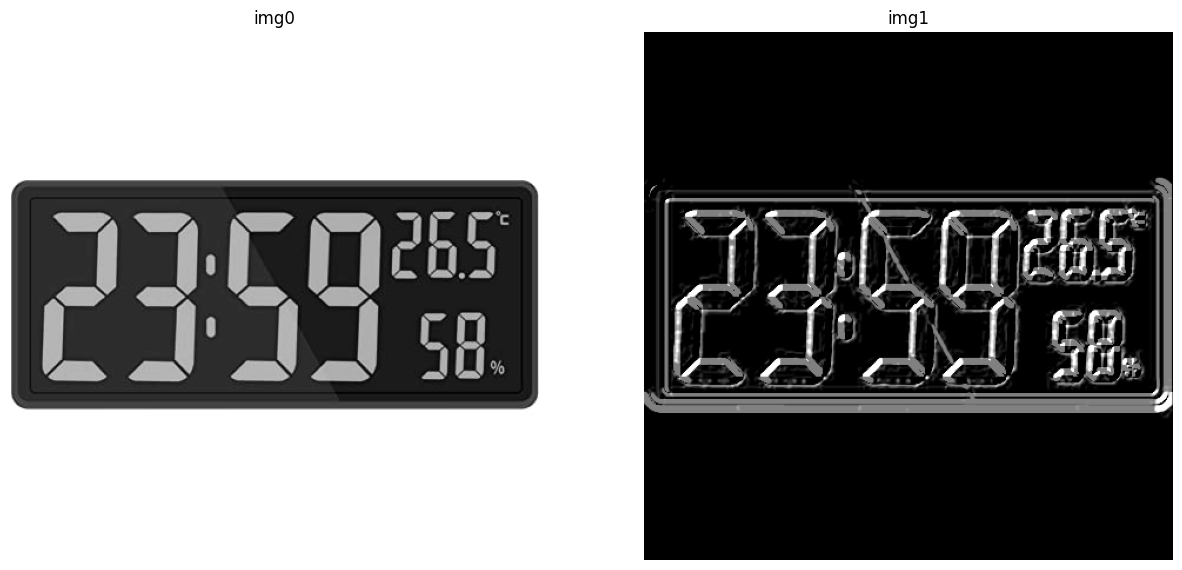

In [11]:
# merge sobelx and sobely

gradient = cv.addWeighted(np.abs(sobelx), 0.5, np.abs(sobely), 0.5, 0)
show_multiple_img(1,2,(img_gray,gradient))


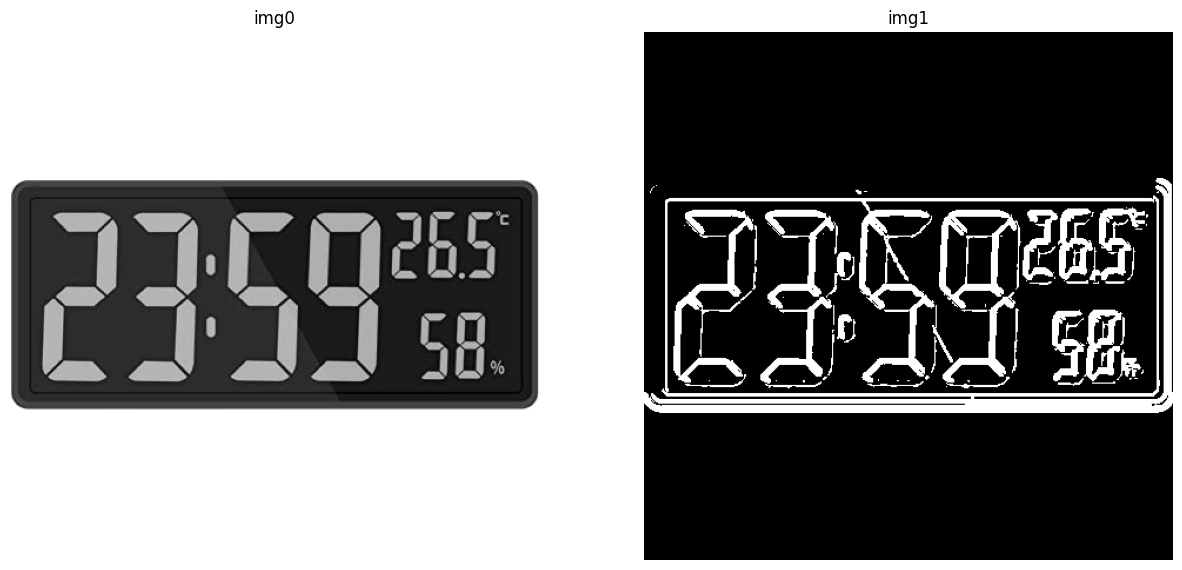

In [12]:
threshold = 100
ret, thresh = cv.threshold(gradient,threshold,255,cv.THRESH_BINARY)
show_multiple_img(1,2,(img_gray,thresh))

## Laplacian

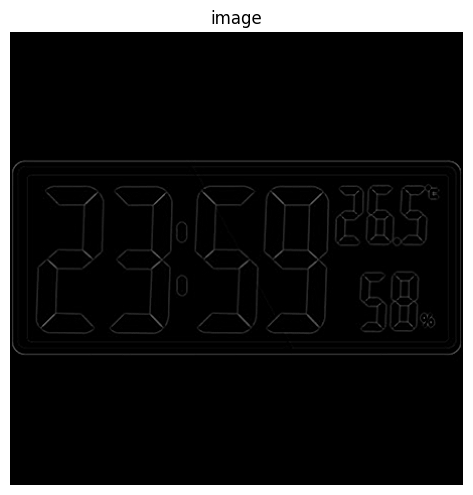

In [13]:
#laplacian

laplacian = cv.Laplacian(img_blur,-1)

image_plot(laplacian)

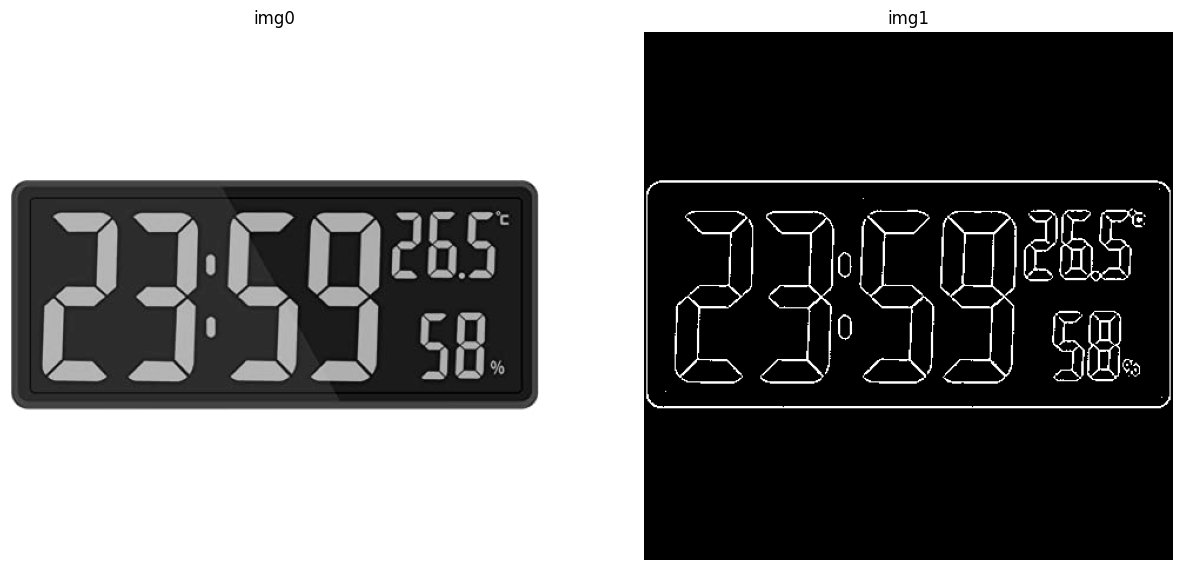

In [14]:
threshold = 20
ret, thresh = cv.threshold(laplacian,threshold,255,cv.THRESH_BINARY)
show_multiple_img(1,2,(img_gray,thresh))

## Canny

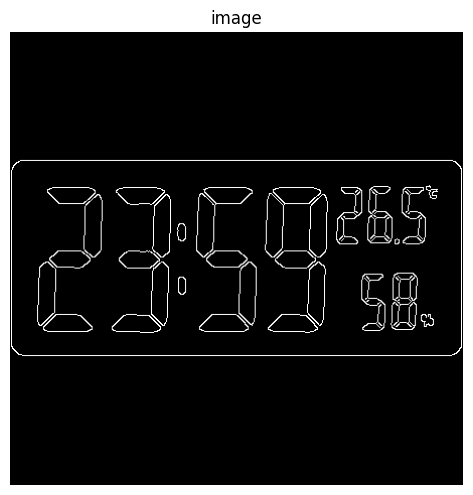

In [15]:
#canny
canny = cv.Canny(img_blur,threshold1=210,threshold2=250)
image_plot(canny)

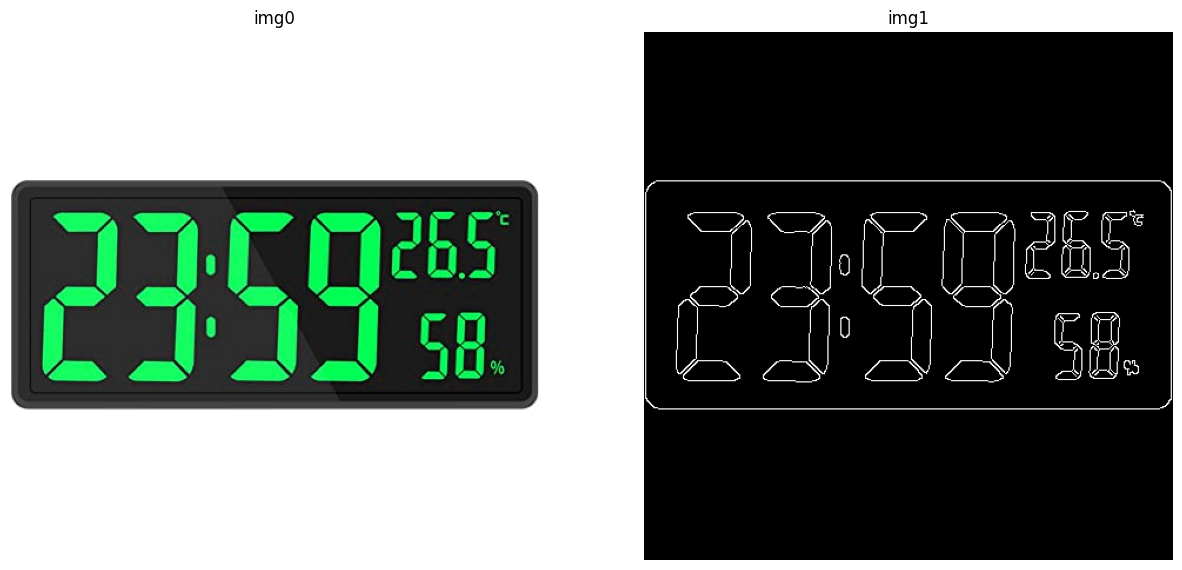

In [16]:
show_multiple_img(1,2,(org_img,canny))